In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [2]:
# 创建结果保存文件夹
output_dirs = {
    'canny': 'result/canny',
    'sobel': 'result/sobel',
    'prewitt': 'result/prewitt'  # 修改为 log 以保存 Laplacian of Gaussian 结果
}

for key, dir_path in output_dirs.items():
    os.makedirs(dir_path, exist_ok=True)
    
# 输入图像文件夹路径
input_dir = 'Aft_Original_Crack_DataSet_Second'

In [3]:
# 预处理函数：读取图像、灰度化、高斯滤波去噪、计算梯度幅值和方向
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)

    # 计算水平和垂直梯度
    grad_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

    # 计算梯度幅值和方向
    magnitude = np.sqrt(grad_x ** 2 + grad_y ** 2)
    direction = np.arctan2(grad_y, grad_x)
    direction = direction * 180 / np.pi  # 转换为角度

    return magnitude, direction, blurred_image

# 边缘检测：使用Canny检测
def detect_edges_canny(image, low_threshold=50, high_threshold=150):
    # 使用中等模糊来减少噪声
    blurred_image = cv2.GaussianBlur(image, (5, 5), 2.0)  # 核大小为 5x5，标准差为 1.5
    edges = cv2.Canny(blurred_image, low_threshold, high_threshold)
    return edges

# 边缘检测：使用Sobel检测
def detect_edges_sobel(image):
    blurred_image = cv2.GaussianBlur(image, (9, 9), 3.5)
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    edges = cv2.magnitude(grad_x, grad_y)
    edges = np.uint8(edges)
    return edges

# 边缘检测：使用 Prewitt 检测
def detect_edges_prewitt(image):
    blurred_image = cv2.GaussianBlur(image, (9, 9), 3.5)
    prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float64)
    prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float64)

    grad_x = cv2.filter2D(blurred_image, cv2.CV_64F, prewitt_kernel_x)
    grad_y = cv2.filter2D(blurred_image, cv2.CV_64F, prewitt_kernel_y)

    edges = np.sqrt(grad_x ** 2 + grad_y ** 2)
    edges = np.uint8(np.clip(edges, 0, 255))

    return edges

Testing random file: 1 (1314).jpg
Testing random file: 1 (1989).jpg
Testing random file: 1 (580).jpg
Testing random file: 1 (248).jpg


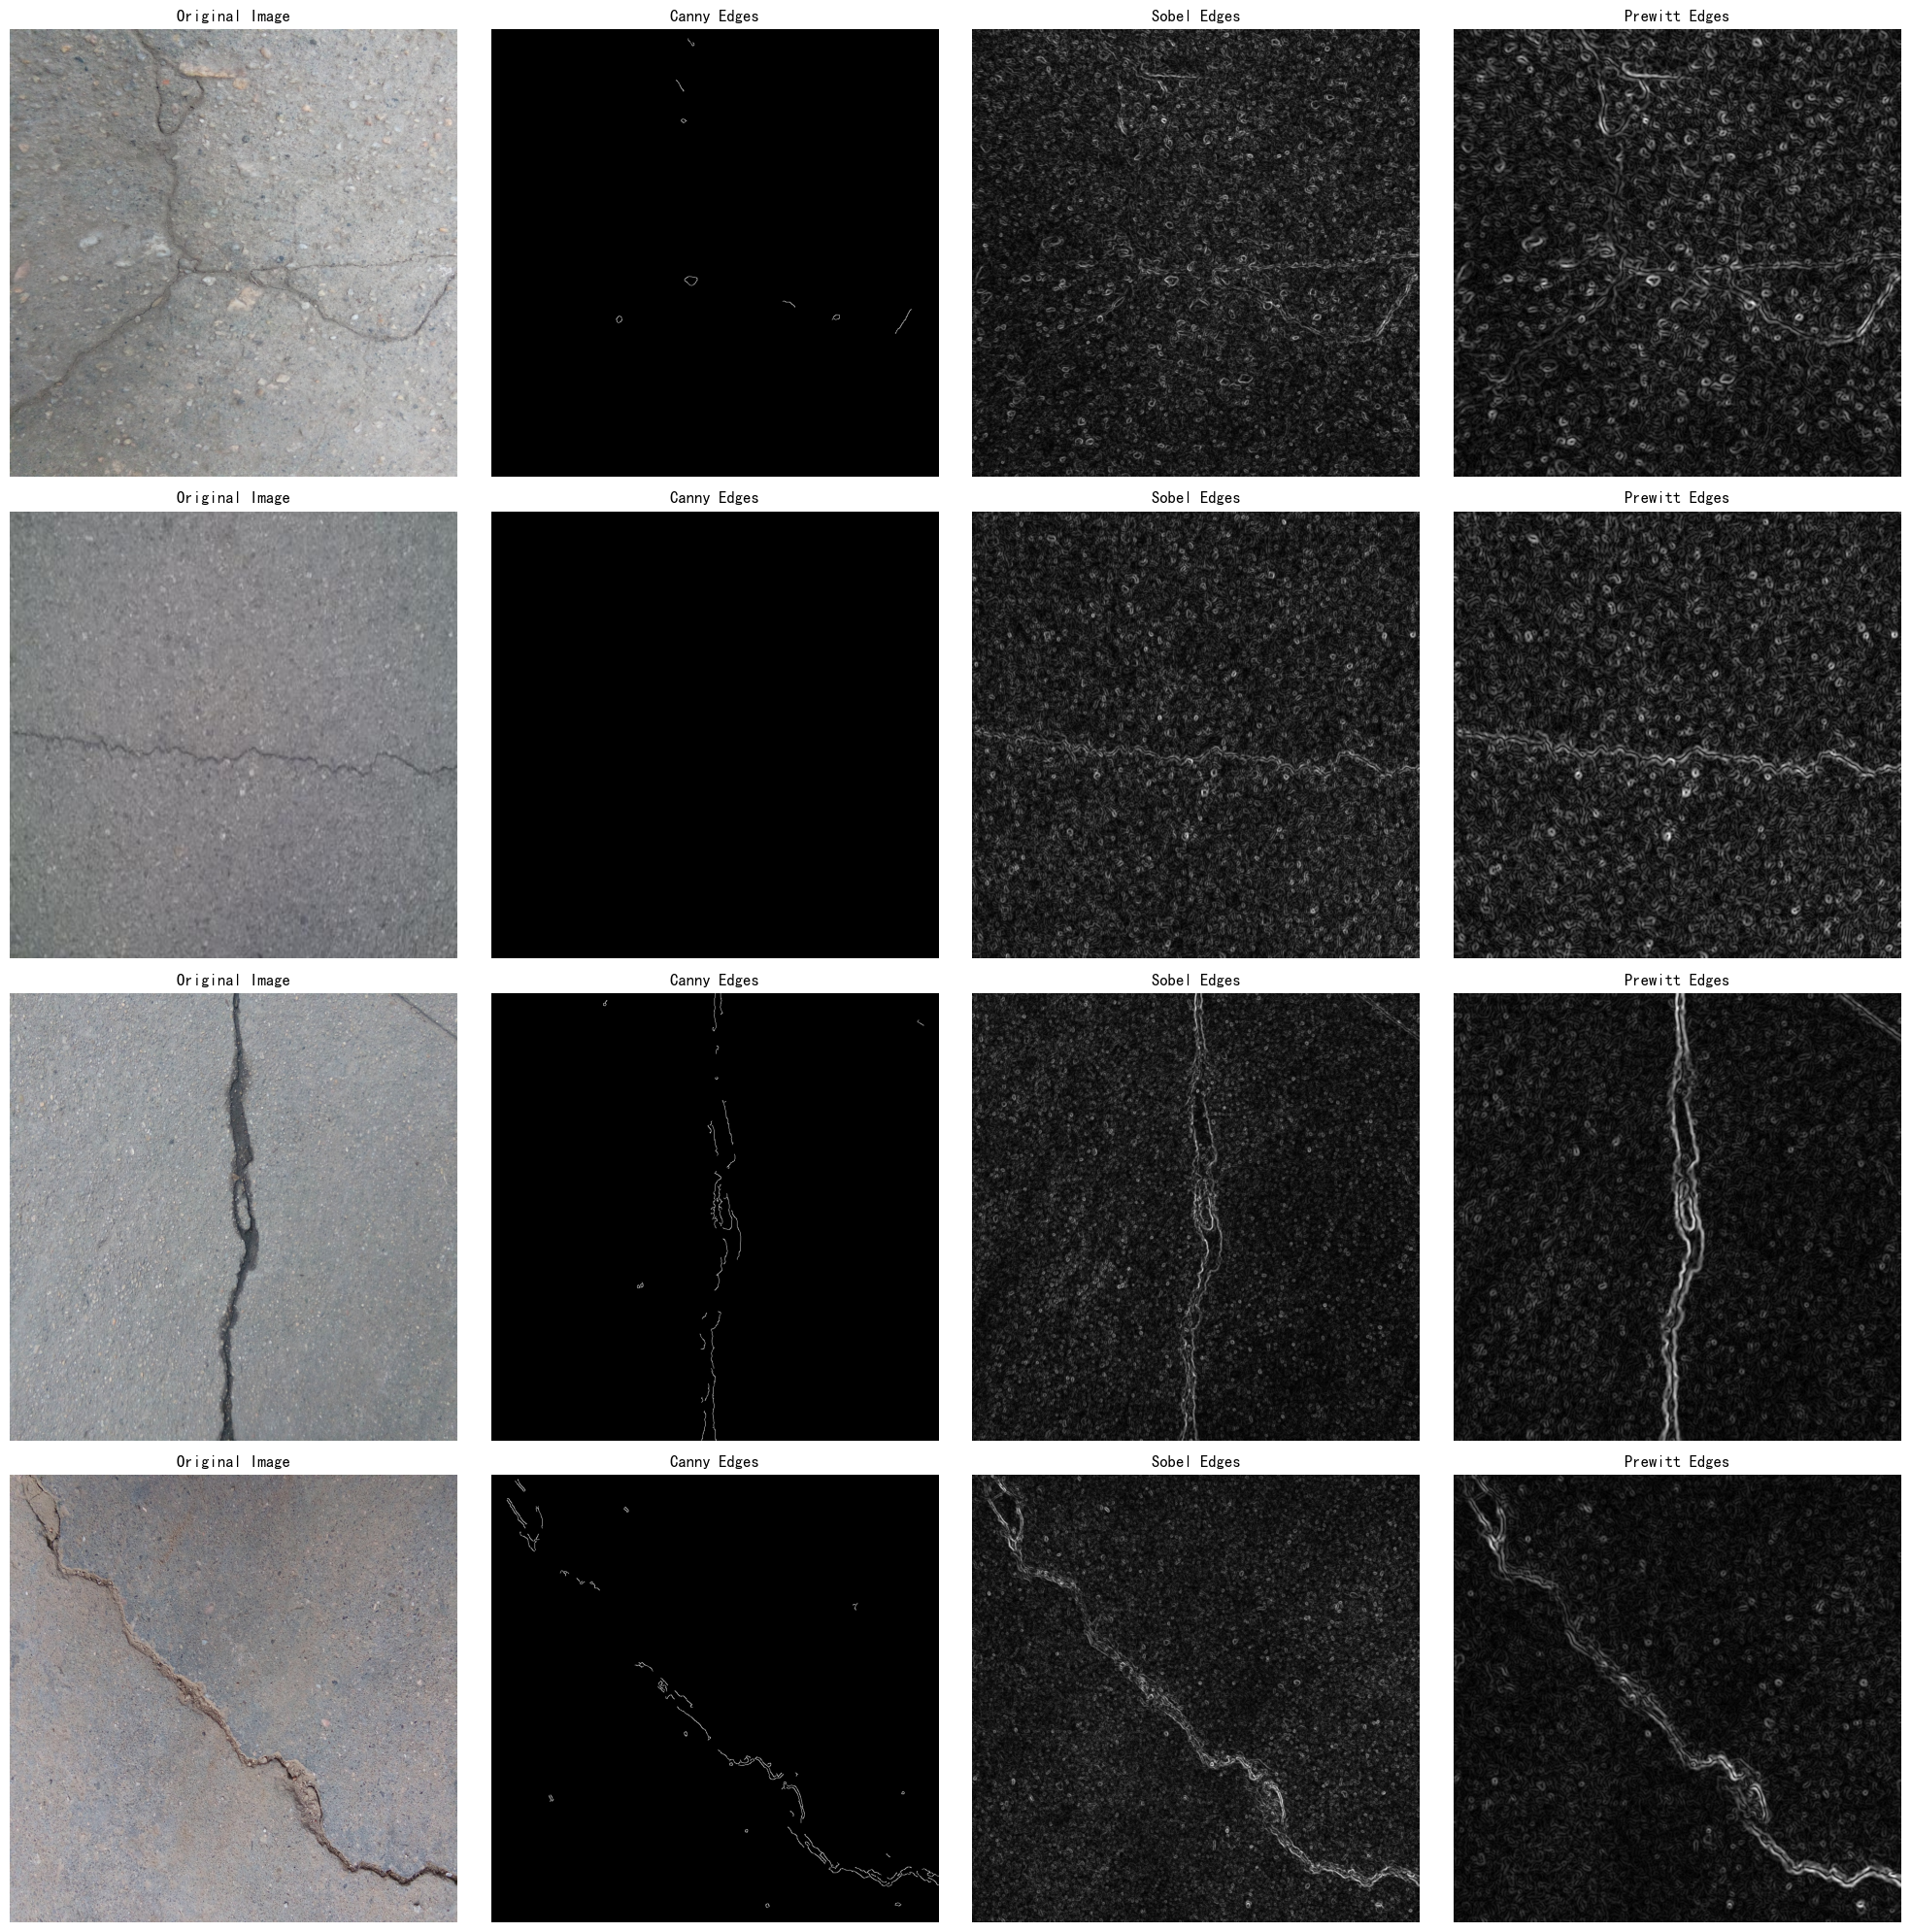

In [4]:
# 测试随机选择的图像
def test_random_images(input_dir):
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 创建一个 4x4 的子图布局

    for i in range(4):  # 随机选择4个文件进行测试
        random_index = random.randint(1, 2069)
        random_file_name = f'1 ({random_index}).jpg'
        image_path = os.path.join(input_dir, random_file_name)

        if os.path.exists(image_path):
            print(f'Testing random file: {random_file_name}')
            original_image = cv2.imread(image_path)

            # 预处理图像并获取模糊后的图像
            _, _, blurred_image = preprocess_image(image_path)

            # 三种边缘检测方法
            edges_canny = detect_edges_canny(blurred_image)
            edges_sobel = detect_edges_sobel(blurred_image)
            edges_prewitt = detect_edges_prewitt(blurred_image)

            # 在子图中显示
            row = i  # 第 i 行

            # 原始图像
            axes[row, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            axes[row, 0].set_title('Original Image')
            axes[row, 0].axis('off')

            # Canny 边缘检测结果
            axes[row, 1].imshow(edges_canny, cmap='gray')
            axes[row, 1].set_title('Canny Edges')
            axes[row, 1].axis('off')

            # Sobel 边缘检测结果
            axes[row, 2].imshow(edges_sobel, cmap='gray')
            axes[row, 2].set_title('Sobel Edges')
            axes[row, 2].axis('off')

            # Prewitt 边缘检测结果
            axes[row, 3].imshow(edges_prewitt, cmap='gray')
            axes[row, 3].set_title('Prewitt Edges')
            axes[row, 3].axis('off')
        else:
            print(f'{random_file_name} does not exist in the input directory.')

    plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
    plt.show()



# 测试随机选择的图像
test_random_images(input_dir)

In [5]:
# 处理所有图像并保存结果
def process_all_images(input_dir):
    for i in range(1, 2069):  # 从 1 到 2068
        file_name = f'1 ({i}).jpg'
        image_path = os.path.join(input_dir, file_name)

        if os.path.exists(image_path):
            print(f'Processing {file_name}...')
            magnitude, direction, blurred_image = preprocess_image(image_path)

            # 三种边缘检测方法
            edges_canny = detect_edges_canny(blurred_image)
            edges_sobel = detect_edges_sobel(blurred_image)
            edges_prewitt = detect_edges_prewitt(blurred_image)

            # 保存边缘检测结果
            cv2.imwrite(os.path.join(output_dirs['canny'], file_name), edges_canny)
            cv2.imwrite(os.path.join(output_dirs['sobel'], file_name), edges_sobel)
            cv2.imwrite(os.path.join(output_dirs['prewitt'], file_name), edges_prewitt)
        else:
            print(f'{file_name} does not exist in the input directory.')

# 处理所有图像并保存结果
process_all_images(input_dir)

Processing 1 (1).jpg...
Processing 1 (2).jpg...
Processing 1 (3).jpg...
Processing 1 (4).jpg...
Processing 1 (5).jpg...
Processing 1 (6).jpg...
Processing 1 (7).jpg...
Processing 1 (8).jpg...
Processing 1 (9).jpg...
Processing 1 (10).jpg...
Processing 1 (11).jpg...
Processing 1 (12).jpg...
Processing 1 (13).jpg...
Processing 1 (14).jpg...
Processing 1 (15).jpg...
Processing 1 (16).jpg...
Processing 1 (17).jpg...
Processing 1 (18).jpg...
Processing 1 (19).jpg...
Processing 1 (20).jpg...
Processing 1 (21).jpg...
Processing 1 (22).jpg...
Processing 1 (23).jpg...
Processing 1 (24).jpg...
Processing 1 (25).jpg...
Processing 1 (26).jpg...
Processing 1 (27).jpg...
Processing 1 (28).jpg...
Processing 1 (29).jpg...
Processing 1 (30).jpg...
Processing 1 (31).jpg...
Processing 1 (32).jpg...
Processing 1 (33).jpg...
Processing 1 (34).jpg...
Processing 1 (35).jpg...
Processing 1 (36).jpg...
Processing 1 (37).jpg...
Processing 1 (38).jpg...
Processing 1 (39).jpg...
Processing 1 (40).jpg...
Processin

Processing 1 (322).jpg...
Processing 1 (323).jpg...
Processing 1 (324).jpg...
Processing 1 (325).jpg...
Processing 1 (326).jpg...
Processing 1 (327).jpg...
Processing 1 (328).jpg...
Processing 1 (329).jpg...
Processing 1 (330).jpg...
Processing 1 (331).jpg...
Processing 1 (332).jpg...
Processing 1 (333).jpg...
Processing 1 (334).jpg...
Processing 1 (335).jpg...
Processing 1 (336).jpg...
Processing 1 (337).jpg...
Processing 1 (338).jpg...
Processing 1 (339).jpg...
Processing 1 (340).jpg...
Processing 1 (341).jpg...
Processing 1 (342).jpg...
Processing 1 (343).jpg...
Processing 1 (344).jpg...
Processing 1 (345).jpg...
Processing 1 (346).jpg...
Processing 1 (347).jpg...
Processing 1 (348).jpg...
Processing 1 (349).jpg...
Processing 1 (350).jpg...
Processing 1 (351).jpg...
Processing 1 (352).jpg...
Processing 1 (353).jpg...
Processing 1 (354).jpg...
Processing 1 (355).jpg...
Processing 1 (356).jpg...
Processing 1 (357).jpg...
Processing 1 (358).jpg...
Processing 1 (359).jpg...
Processing 1

Processing 1 (640).jpg...
Processing 1 (641).jpg...
Processing 1 (642).jpg...
Processing 1 (643).jpg...
Processing 1 (644).jpg...
Processing 1 (645).jpg...
Processing 1 (646).jpg...
Processing 1 (647).jpg...
Processing 1 (648).jpg...
Processing 1 (649).jpg...
Processing 1 (650).jpg...
Processing 1 (651).jpg...
Processing 1 (652).jpg...
Processing 1 (653).jpg...
Processing 1 (654).jpg...
Processing 1 (655).jpg...
Processing 1 (656).jpg...
Processing 1 (657).jpg...
Processing 1 (658).jpg...
Processing 1 (659).jpg...
Processing 1 (660).jpg...
Processing 1 (661).jpg...
Processing 1 (662).jpg...
Processing 1 (663).jpg...
Processing 1 (664).jpg...
Processing 1 (665).jpg...
Processing 1 (666).jpg...
Processing 1 (667).jpg...
Processing 1 (668).jpg...
Processing 1 (669).jpg...
Processing 1 (670).jpg...
Processing 1 (671).jpg...
Processing 1 (672).jpg...
Processing 1 (673).jpg...
Processing 1 (674).jpg...
Processing 1 (675).jpg...
Processing 1 (676).jpg...
Processing 1 (677).jpg...
Processing 1

Processing 1 (956).jpg...
Processing 1 (957).jpg...
Processing 1 (958).jpg...
Processing 1 (959).jpg...
Processing 1 (960).jpg...
Processing 1 (961).jpg...
Processing 1 (962).jpg...
Processing 1 (963).jpg...
Processing 1 (964).jpg...
Processing 1 (965).jpg...
Processing 1 (966).jpg...
Processing 1 (967).jpg...
Processing 1 (968).jpg...
Processing 1 (969).jpg...
Processing 1 (970).jpg...
Processing 1 (971).jpg...
Processing 1 (972).jpg...
Processing 1 (973).jpg...
Processing 1 (974).jpg...
Processing 1 (975).jpg...
Processing 1 (976).jpg...
Processing 1 (977).jpg...
Processing 1 (978).jpg...
Processing 1 (979).jpg...
Processing 1 (980).jpg...
Processing 1 (981).jpg...
Processing 1 (982).jpg...
Processing 1 (983).jpg...
Processing 1 (984).jpg...
Processing 1 (985).jpg...
Processing 1 (986).jpg...
Processing 1 (987).jpg...
Processing 1 (988).jpg...
Processing 1 (989).jpg...
Processing 1 (990).jpg...
Processing 1 (991).jpg...
Processing 1 (992).jpg...
Processing 1 (993).jpg...
Processing 1

Processing 1 (1262).jpg...
Processing 1 (1263).jpg...
Processing 1 (1264).jpg...
Processing 1 (1265).jpg...
Processing 1 (1266).jpg...
Processing 1 (1267).jpg...
Processing 1 (1268).jpg...
Processing 1 (1269).jpg...
Processing 1 (1270).jpg...
Processing 1 (1271).jpg...
Processing 1 (1272).jpg...
Processing 1 (1273).jpg...
Processing 1 (1274).jpg...
Processing 1 (1275).jpg...
Processing 1 (1276).jpg...
Processing 1 (1277).jpg...
Processing 1 (1278).jpg...
Processing 1 (1279).jpg...
Processing 1 (1280).jpg...
Processing 1 (1281).jpg...
Processing 1 (1282).jpg...
Processing 1 (1283).jpg...
Processing 1 (1284).jpg...
Processing 1 (1285).jpg...
Processing 1 (1286).jpg...
Processing 1 (1287).jpg...
Processing 1 (1288).jpg...
Processing 1 (1289).jpg...
Processing 1 (1290).jpg...
Processing 1 (1291).jpg...
Processing 1 (1292).jpg...
Processing 1 (1293).jpg...
Processing 1 (1294).jpg...
Processing 1 (1295).jpg...
Processing 1 (1296).jpg...
Processing 1 (1297).jpg...
Processing 1 (1298).jpg...
P

Processing 1 (1568).jpg...
Processing 1 (1569).jpg...
Processing 1 (1570).jpg...
Processing 1 (1571).jpg...
Processing 1 (1572).jpg...
Processing 1 (1573).jpg...
Processing 1 (1574).jpg...
Processing 1 (1575).jpg...
Processing 1 (1576).jpg...
Processing 1 (1577).jpg...
Processing 1 (1578).jpg...
Processing 1 (1579).jpg...
Processing 1 (1580).jpg...
Processing 1 (1581).jpg...
Processing 1 (1582).jpg...
Processing 1 (1583).jpg...
Processing 1 (1584).jpg...
Processing 1 (1585).jpg...
Processing 1 (1586).jpg...
Processing 1 (1587).jpg...
Processing 1 (1588).jpg...
Processing 1 (1589).jpg...
Processing 1 (1590).jpg...
Processing 1 (1591).jpg...
Processing 1 (1592).jpg...
Processing 1 (1593).jpg...
Processing 1 (1594).jpg...
Processing 1 (1595).jpg...
Processing 1 (1596).jpg...
Processing 1 (1597).jpg...
Processing 1 (1598).jpg...
Processing 1 (1599).jpg...
Processing 1 (1600).jpg...
Processing 1 (1601).jpg...
Processing 1 (1602).jpg...
Processing 1 (1603).jpg...
Processing 1 (1604).jpg...
P

Processing 1 (1875).jpg...
Processing 1 (1876).jpg...
Processing 1 (1877).jpg...
Processing 1 (1878).jpg...
Processing 1 (1879).jpg...
Processing 1 (1880).jpg...
Processing 1 (1881).jpg...
Processing 1 (1882).jpg...
Processing 1 (1883).jpg...
Processing 1 (1884).jpg...
Processing 1 (1885).jpg...
Processing 1 (1886).jpg...
Processing 1 (1887).jpg...
Processing 1 (1888).jpg...
Processing 1 (1889).jpg...
Processing 1 (1890).jpg...
Processing 1 (1891).jpg...
Processing 1 (1892).jpg...
Processing 1 (1893).jpg...
Processing 1 (1894).jpg...
Processing 1 (1895).jpg...
Processing 1 (1896).jpg...
Processing 1 (1897).jpg...
Processing 1 (1898).jpg...
Processing 1 (1899).jpg...
Processing 1 (1900).jpg...
Processing 1 (1901).jpg...
Processing 1 (1902).jpg...
Processing 1 (1903).jpg...
Processing 1 (1904).jpg...
Processing 1 (1905).jpg...
Processing 1 (1906).jpg...
Processing 1 (1907).jpg...
Processing 1 (1908).jpg...
Processing 1 (1909).jpg...
Processing 1 (1910).jpg...
Processing 1 (1911).jpg...
P